Explore the bash history of this computer
========

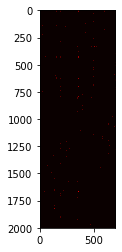

In [2]:
from os.path import expanduser
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

home = expanduser("~")
with (open(home + "/.bash_history")) as f:
    history = f.read()
    corpus = history.split('\n')
    vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(corpus)
    a = X.toarray()
    plt.imshow(a, cmap='hot', interpolation='nearest')
    plt.show()